<a href="https://www.kaggle.com/code/anupamsaha002/assignment2-housepriceprediction-ipynb?scriptVersionId=258119791" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

✅ Dataset loaded successfully!
Total Houses = 545

📌 Available columns in dataset:
Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

📊 Model Performance:
R² Accuracy = 27.29%
Average Error (MAE) = 1474748.13


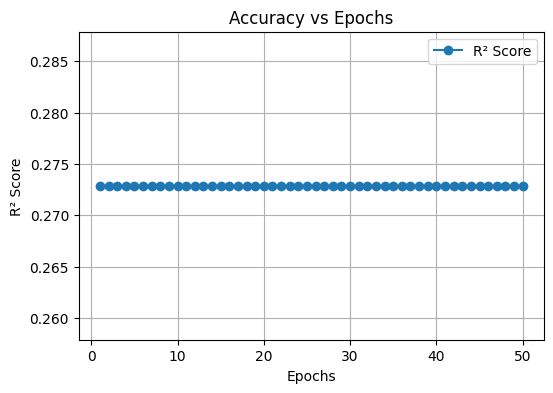

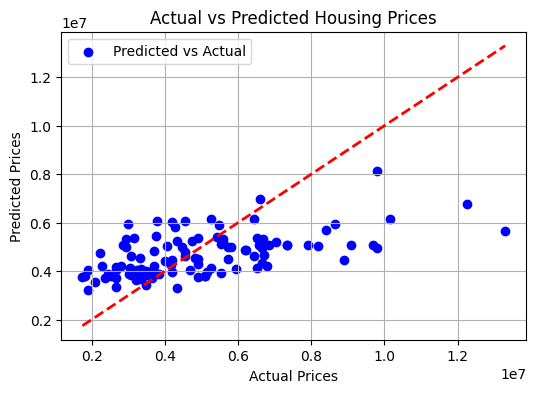

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error


# Kaggle dataset folder
data = pd.read_csv("/kaggle/input/housing-prices-dataset/Housing.csv")

print("✅ Dataset loaded successfully!")
print("Total Houses =", len(data))
print("\n📌 Available columns in dataset:")
print(data.columns)


feature_column = "area"   
target_column = "price"  

# Safety check
if feature_column not in data.columns or target_column not in data.columns:
    raise KeyError(f"Please update 'feature_column' and 'target_column' to match dataset columns: {list(data.columns)}")

X = data[[feature_column]]  
y = data[target_column]     

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()

epochs = 50
r2_scores = []

for epoch in range(1, epochs+1):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    r2_scores.append(score)


final_pred = model.predict(X_test)
final_r2 = r2_score(y_test, final_pred) * 100   # in %
mae = mean_absolute_error(y_test, final_pred)

print("\n📊 Model Performance:")
print("R² Accuracy = {:.2f}%".format(final_r2))
print("Average Error (MAE) =", round(mae, 2))



# Accuracy vs Epochs graph
plt.figure(figsize=(6,4))
plt.plot(range(1, epochs+1), r2_scores, marker='o', label="R² Score")
plt.xlabel("Epochs")
plt.ylabel("R² Score")
plt.title("Accuracy vs Epochs")
plt.legend()
plt.grid(True)
plt.show()

# Actual vs Predicted Prices graph
plt.figure(figsize=(6,4))
plt.scatter(y_test, final_pred, color="blue", label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Housing Prices")
plt.legend()
plt.grid(True)
plt.show()
